#Lab 3 - Unsupervised Learning
- Name: Yadu Krishnan Madhu
- Section: 10
- Student Number: 500975010

In [7]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import accuracy_score
from sklearn.metrics import adjusted_rand_score
from sklearn import metrics
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt



#  Dataset 1
data1 = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])

#  Dataset 2
data2 = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv")
data2 = data2.iloc[0:, 1:]

# Part A

## Initializing Data set 1, initial seeds and a few helper functions

In [8]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def kmeans(data, k, centress, max_iterations=100):
    centers = centress.copy()
    clusters = [[] for _ in range(len(centress))]
    iterations = 0

    for i in range(max_iterations):
        new_clusters = [[] for _ in range(k)]
        new_centers = []

        for point in data:
            distances = [euclidean_distance(point, center) for center in centers]
            cluster_index = np.argmin(distances)
            new_clusters[cluster_index].append(point)

        # Update centers
        for center, cluster in zip(centers, new_clusters):
          if cluster:
              new_center = np.mean(cluster, axis=0)
          else:
              new_center = center

          # Append the new center to the list of new centers
          new_centers.append(new_center)

        print("\n")
        for x, centerIter in enumerate(centers):
          print(f"At epoch {i + 1}, the center {centerIter} has clusters: {new_clusters[x]}")
        print("\n")

        # Check for convergence
        if np.array_equal(centers, new_centers):
            iterations = i + 1
            print(f"\nQ4: Only {iterations} epoch{'s' if (iterations > 1) else ''} needed for convergence.\n")
            break

        # Plot at every epoch
        plt.figure(figsize=(10, 6))
        for j, cluster in enumerate(new_clusters):
            if cluster:
                cluster_points = np.array(cluster)
                plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {j+1}')
        centers_np = np.array(centers)  # Convert to NumPy array
        plt.scatter(centers_np[:, 0], centers_np[:, 1], marker='x', c='purple', s=200, label='Final Cluster Centers')
        plt.scatter(centress[:, 0], centress[:, 1], marker='o', c='none', edgecolors='blue', s=200, label='Original Cluster Centers')
        plt.title(f'Clusters After Epoch {i + 1}')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.grid(True)
        plt.legend()
        plt.show()

        centers = new_centers
        clusters = new_clusters


    return centers, clusters, iterations

## Dataset 1



At epoch 1, the center [2 5] has clusters: [array([2, 5]), array([1, 2])]
At epoch 1, the center [8 4] has clusters: [array([8, 4]), array([7, 5]), array([6, 4])]
At epoch 1, the center [4 9] has clusters: [array([ 2, 10]), array([5, 8]), array([4, 9])]




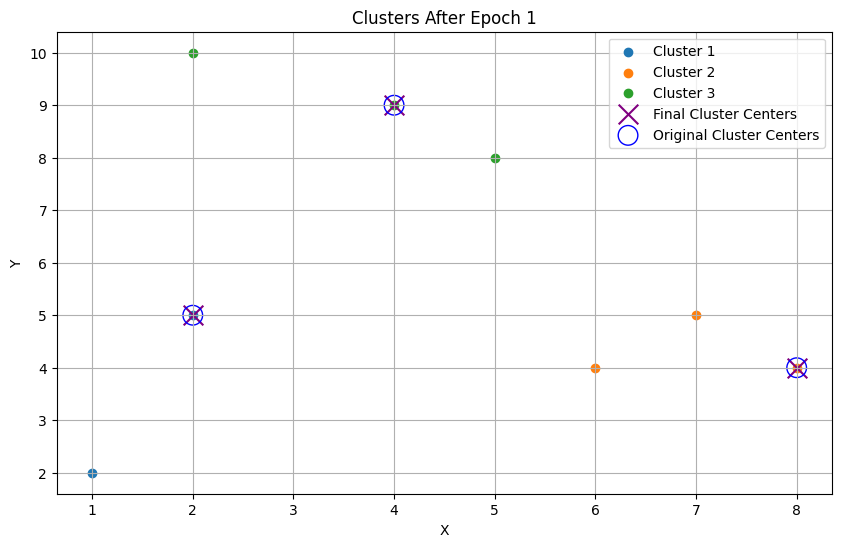



At epoch 2, the center [1.5 3.5] has clusters: [array([2, 5]), array([1, 2])]
At epoch 2, the center [7.         4.33333333] has clusters: [array([8, 4]), array([7, 5]), array([6, 4])]
At epoch 2, the center [3.66666667 9.        ] has clusters: [array([ 2, 10]), array([5, 8]), array([4, 9])]



Q4: Only 2 epochs needed for convergence.




-----------------------
Final Clusters After Convergence
-----------------------





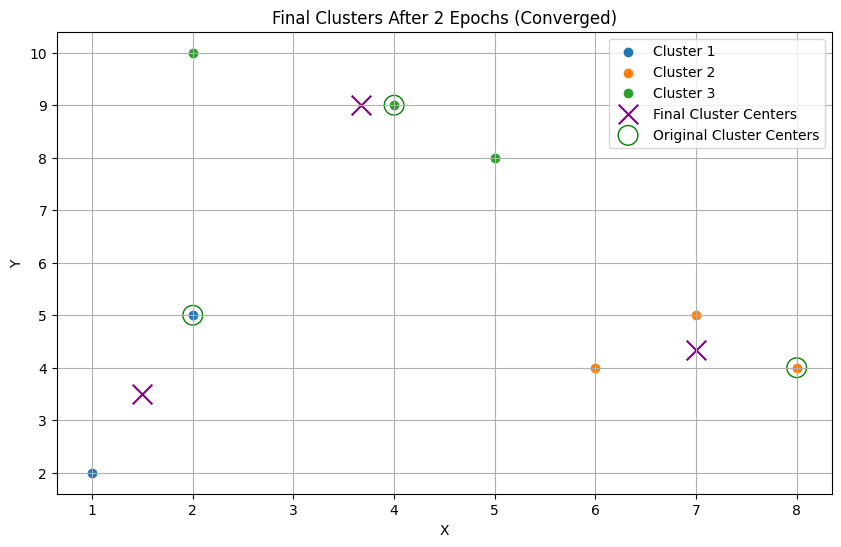



Convergence achieved in 2 epochs.


In [9]:
centress = np.array([data1[1], data1[2], data1[7]])

# Run K-means for 100 epochs max
convergedAt = 0
centers, clusters, convergedAt = kmeans(data1, 3, centress, max_iterations=100)
centers = np.array(centers)


print("\n\n\n-----------------------\nFinal Clusters After Convergence\n-----------------------\n\n\n")

# Plot
plt.figure(figsize=(10, 6))
for i, cluster in enumerate(clusters):
    if cluster:
        cluster_points = np.array(cluster)
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')
plt.scatter(centers[:, 0], centers[:, 1], marker='x', c='purple', s=200, label='Final Cluster Centers')
plt.scatter(centress[:, 0], centress[:, 1], marker='o', c='none', edgecolors='green', s=200, label='Original Cluster Centers')
plt.title(f"Final Clusters After {convergedAt} Epoch{'s' if (convergedAt > 1) else ''} (Converged)")
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()
plt.show()

# Check if more iterations needed to converge
print(f"\n\nConvergence achieved in {convergedAt} epoch{'s' if (convergedAt > 1) else ''}.")

## Q4 AnswerL

2 Iterations are needed. Only 1 after the initial epoch.

Note: I am counting iterations until the centers dont change.

## Dataset 2



At epoch 1, the center [138.   0.] has clusters: [array([138.,   0.]), array([170.,   0.]), array([128.,   0.]), array([128.,   0.]), array([1.3e+02, 5.0e-02]), array([174.,   0.]), array([124.,   0.]), array([154.,   0.]), array([156.,   0.]), array([132.,   0.]), array([128.,   0.]), array([144. ,   0.4]), array([154.  ,   0.31]), array([148.,   0.]), array([138.  ,   0.87]), array([198.  ,   0.52]), array([1.3e+02, 8.0e-02]), array([134. ,   0.9]), array([134.,   0.]), array([124. ,   0.4]), array([166. ,   0.6]), array([132.  ,   0.72]), array([150.,   0.]), array([1.34e+02, 1.20e-01]), array([148. ,   0.5]), array([140.,   0.]), array([126.,   0.]), array([126.  ,   0.96]), array([144.,   0.]), array([146.,   0.]), array([130.  ,   0.54]), array([178.  ,   0.95]), array([142.,   0.]), array([126.,   0.]), array([132.,   0.]), array([120.,   0.]), array([166. ,   0.8]), array([216.  ,   0.92]), array([176.,   0.]), array([126.,   0.]), array([174.,   0.]), array([132.,   0.]), ar

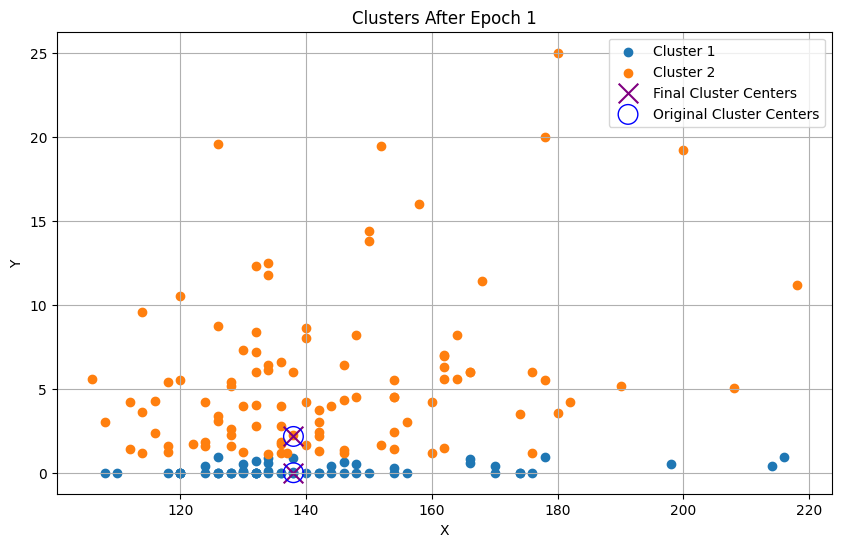



At epoch 2, the center [141.96721311   0.19196721] has clusters: [array([138.,   0.]), array([138.  ,   2.27]), array([128.,   0.]), array([136. ,   1.2]), array([128.,   0.]), array([142. ,   2.4]), array([1.3e+02, 5.0e-02]), array([114. ,   9.6]), array([124.,   0.]), array([114. ,   1.2]), array([136. ,   1.7]), array([132.,   0.]), array([128.,   0.]), array([106. ,   5.6]), array([144. ,   0.4]), array([126. ,   3.1]), array([146.  ,   1.35]), array([148.,   0.]), array([124. ,   4.2]), array([118.  ,   1.62]), array([116.  ,   4.28]), array([138.  ,   0.87]), array([137. ,   1.2]), array([128. ,   5.4]), array([1.3e+02, 8.0e-02]), array([136.  ,   3.99]), array([122. ,   1.7]), array([134. ,   0.9]), array([134.,   0.]), array([132.  ,   4.05]), array([124. ,   0.4]), array([132.  ,   0.72]), array([150.,   0.]), array([1.34e+02, 1.20e-01]), array([126. ,   3.4]), array([148. ,   0.5]), array([132.,   6.]), array([128. ,   1.6]), array([128.  ,   5.16]), array([140.,   0.]), ar

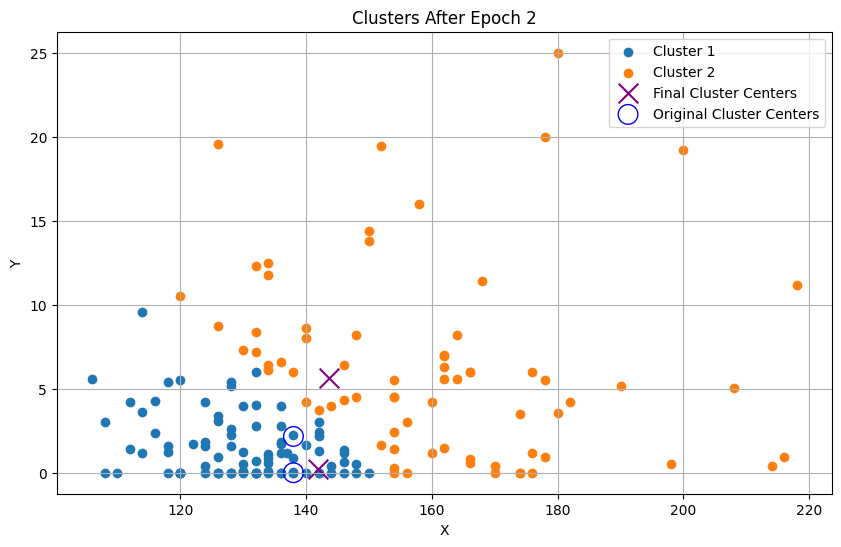



At epoch 3, the center [129.79120879   1.49373626] has clusters: [array([138.,   0.]), array([138.  ,   2.27]), array([128.,   0.]), array([136. ,   1.2]), array([128.,   0.]), array([132. ,   8.4]), array([142. ,   2.4]), array([1.3e+02, 5.0e-02]), array([114. ,   9.6]), array([124.,   0.]), array([114. ,   1.2]), array([142.  ,   3.72]), array([140. ,   8.6]), array([136. ,   1.7]), array([132.,   0.]), array([128.,   0.]), array([106. ,   5.6]), array([144. ,   0.4]), array([126. ,   3.1]), array([134. ,   6.4]), array([130.  ,   7.28]), array([138.,   6.]), array([124. ,   4.2]), array([118.  ,   1.62]), array([116.  ,   4.28]), array([138.  ,   0.87]), array([137. ,   1.2]), array([128. ,   5.4]), array([1.3e+02, 8.0e-02]), array([120. ,  10.5]), array([136.  ,   3.99]), array([134.  ,  11.79]), array([122. ,   1.7]), array([134. ,   0.9]), array([134.,   0.]), array([136. ,   6.6]), array([132.  ,   4.05]), array([132. ,  12.3]), array([124. ,   0.4]), array([140. ,   4.2]), ar

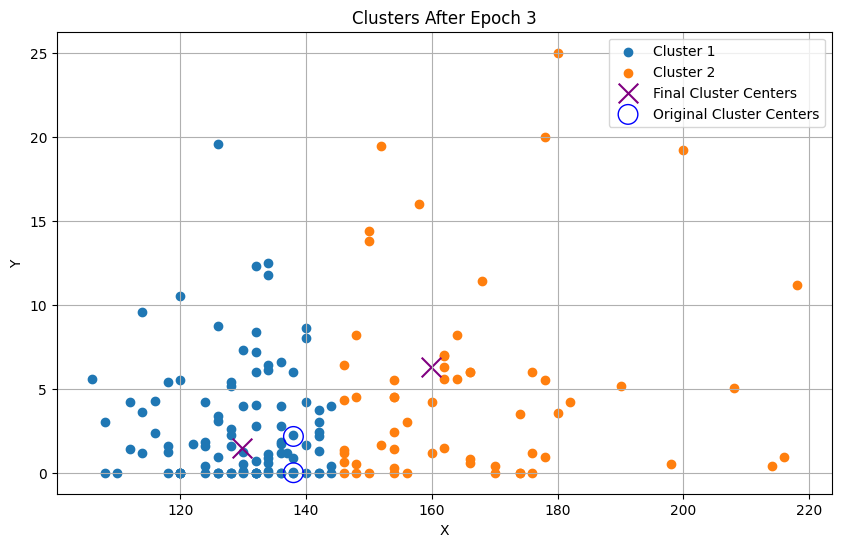



At epoch 4, the center [129.3627451    2.78647059] has clusters: [array([138.,   0.]), array([138.  ,   2.27]), array([128.,   0.]), array([136. ,   1.2]), array([128.,   0.]), array([132. ,   8.4]), array([142. ,   2.4]), array([1.3e+02, 5.0e-02]), array([114. ,   9.6]), array([124.,   0.]), array([114. ,   1.2]), array([142.  ,   3.72]), array([146.  ,   4.36]), array([140. ,   8.6]), array([136. ,   1.7]), array([132.,   0.]), array([128.,   0.]), array([106. ,   5.6]), array([144. ,   0.4]), array([126. ,   3.1]), array([134. ,   6.4]), array([146.  ,   1.35]), array([130.  ,   7.28]), array([138.,   6.]), array([124. ,   4.2]), array([118.  ,   1.62]), array([116.  ,   4.28]), array([138.  ,   0.87]), array([137. ,   1.2]), array([128. ,   5.4]), array([1.3e+02, 8.0e-02]), array([120. ,  10.5]), array([136.  ,   3.99]), array([134.  ,  11.79]), array([122. ,   1.7]), array([134. ,   0.9]), array([134.,   0.]), array([136. ,   6.6]), array([132.  ,   4.05]), array([132. ,  12.3])

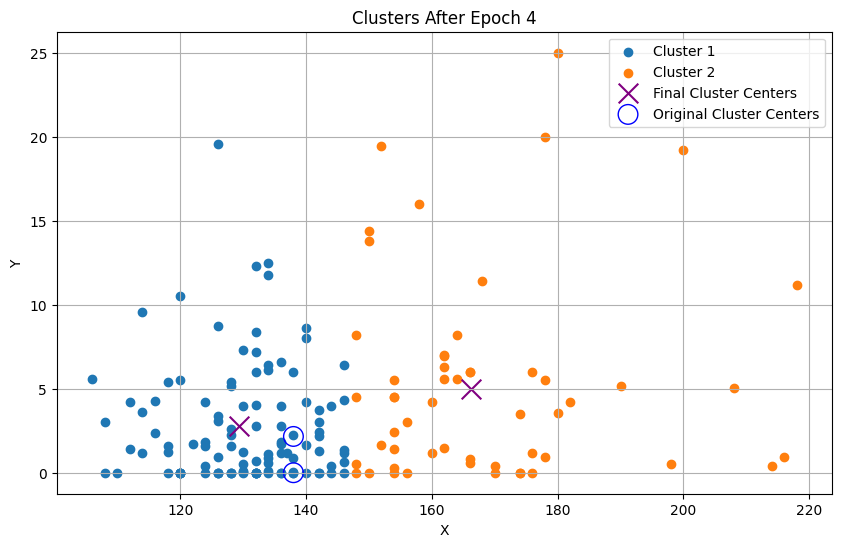



At epoch 5, the center [130.28703704   2.76046296] has clusters: [array([138.,   0.]), array([138.  ,   2.27]), array([128.,   0.]), array([136. ,   1.2]), array([128.,   0.]), array([132. ,   8.4]), array([142. ,   2.4]), array([1.3e+02, 5.0e-02]), array([114. ,   9.6]), array([124.,   0.]), array([114. ,   1.2]), array([142.  ,   3.72]), array([146.  ,   4.36]), array([140. ,   8.6]), array([136. ,   1.7]), array([132.,   0.]), array([128.,   0.]), array([106. ,   5.6]), array([144. ,   0.4]), array([126. ,   3.1]), array([134. ,   6.4]), array([146.  ,   1.35]), array([130.  ,   7.28]), array([138.,   6.]), array([148.,   0.]), array([124. ,   4.2]), array([118.  ,   1.62]), array([116.  ,   4.28]), array([138.  ,   0.87]), array([137. ,   1.2]), array([128. ,   5.4]), array([1.3e+02, 8.0e-02]), array([120. ,  10.5]), array([136.  ,   3.99]), array([134.  ,  11.79]), array([122. ,   1.7]), array([134. ,   0.9]), array([134.,   0.]), array([136. ,   6.6]), array([132.  ,   4.05]), 

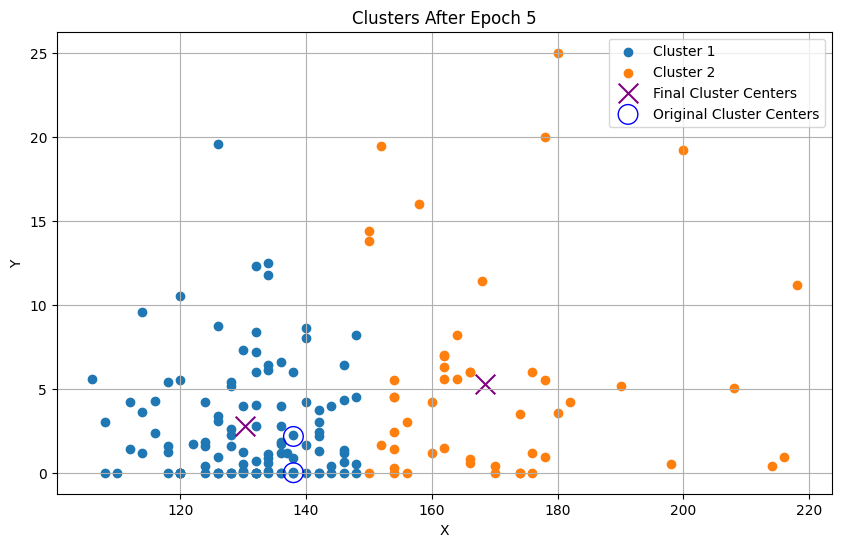



At epoch 6, the center [130.91964286   2.77973214] has clusters: [array([138.,   0.]), array([138.  ,   2.27]), array([128.,   0.]), array([136. ,   1.2]), array([128.,   0.]), array([132. ,   8.4]), array([142. ,   2.4]), array([1.3e+02, 5.0e-02]), array([114. ,   9.6]), array([124.,   0.]), array([114. ,   1.2]), array([142.  ,   3.72]), array([146.  ,   4.36]), array([140. ,   8.6]), array([136. ,   1.7]), array([132.,   0.]), array([128.,   0.]), array([106. ,   5.6]), array([144. ,   0.4]), array([126. ,   3.1]), array([134. ,   6.4]), array([146.  ,   1.35]), array([130.  ,   7.28]), array([138.,   6.]), array([148.,   0.]), array([124. ,   4.2]), array([118.  ,   1.62]), array([116.  ,   4.28]), array([138.  ,   0.87]), array([137. ,   1.2]), array([128. ,   5.4]), array([1.3e+02, 8.0e-02]), array([120. ,  10.5]), array([136.  ,   3.99]), array([134.  ,  11.79]), array([122. ,   1.7]), array([134. ,   0.9]), array([134.,   0.]), array([136. ,   6.6]), array([132.  ,   4.05]), 

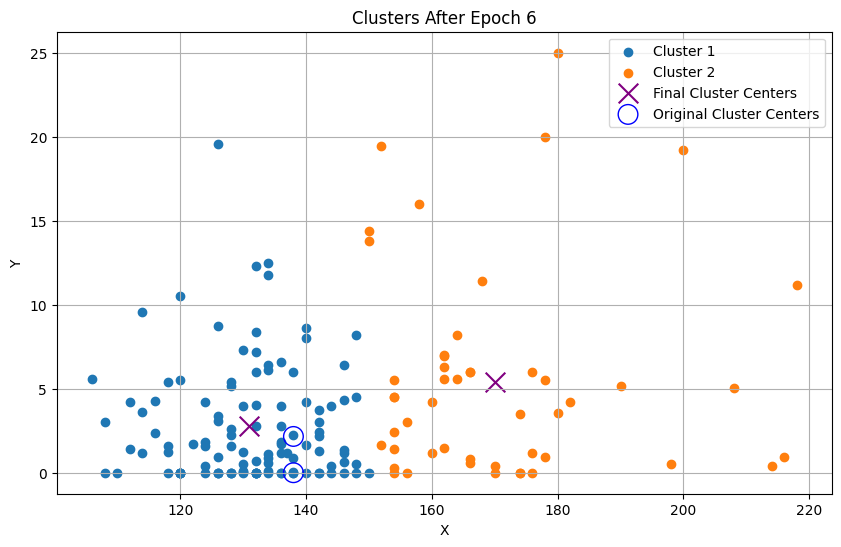



At epoch 7, the center [131.08849558   2.75513274] has clusters: [array([138.,   0.]), array([138.  ,   2.27]), array([128.,   0.]), array([136. ,   1.2]), array([128.,   0.]), array([150. ,  14.4]), array([132. ,   8.4]), array([142. ,   2.4]), array([1.3e+02, 5.0e-02]), array([114. ,   9.6]), array([124.,   0.]), array([114. ,   1.2]), array([142.  ,   3.72]), array([146.  ,   4.36]), array([140. ,   8.6]), array([136. ,   1.7]), array([132.,   0.]), array([128.,   0.]), array([106. ,   5.6]), array([144. ,   0.4]), array([126. ,   3.1]), array([134. ,   6.4]), array([146.  ,   1.35]), array([130.  ,   7.28]), array([138.,   6.]), array([148.,   0.]), array([124. ,   4.2]), array([118.  ,   1.62]), array([116.  ,   4.28]), array([138.  ,   0.87]), array([137. ,   1.2]), array([128. ,   5.4]), array([1.3e+02, 8.0e-02]), array([120. ,  10.5]), array([136.  ,   3.99]), array([134.  ,  11.79]), array([122. ,   1.7]), array([134. ,   0.9]), array([134.,   0.]), array([136. ,   6.6]), ar

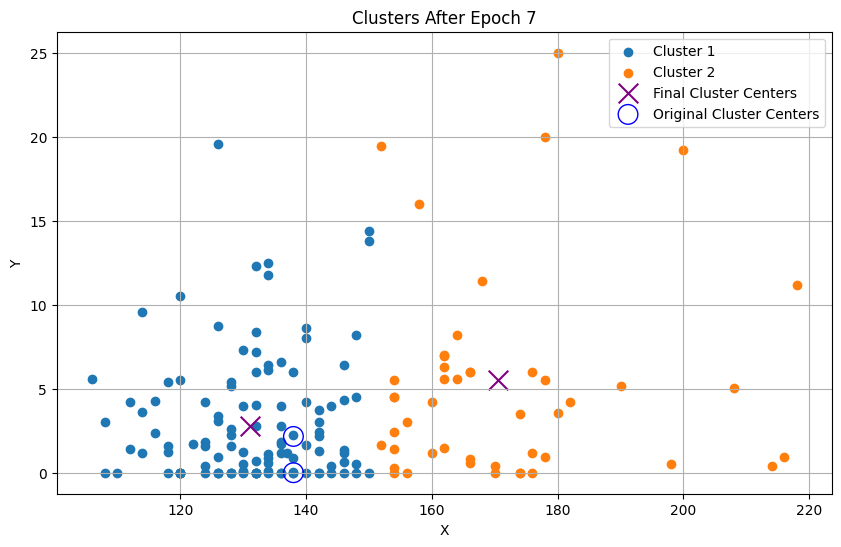



At epoch 8, the center [131.4173913    2.95243478] has clusters: [array([138.,   0.]), array([138.  ,   2.27]), array([128.,   0.]), array([136. ,   1.2]), array([128.,   0.]), array([150. ,  14.4]), array([132. ,   8.4]), array([142. ,   2.4]), array([1.3e+02, 5.0e-02]), array([114. ,   9.6]), array([124.,   0.]), array([114. ,   1.2]), array([142.  ,   3.72]), array([146.  ,   4.36]), array([140. ,   8.6]), array([136. ,   1.7]), array([132.,   0.]), array([128.,   0.]), array([106. ,   5.6]), array([144. ,   0.4]), array([126. ,   3.1]), array([134. ,   6.4]), array([146.  ,   1.35]), array([130.  ,   7.28]), array([138.,   6.]), array([148.,   0.]), array([124. ,   4.2]), array([118.  ,   1.62]), array([116.  ,   4.28]), array([138.  ,   0.87]), array([137. ,   1.2]), array([128. ,   5.4]), array([1.3e+02, 8.0e-02]), array([120. ,  10.5]), array([136.  ,   3.99]), array([134.  ,  11.79]), array([122. ,   1.7]), array([134. ,   0.9]), array([134.,   0.]), array([136. ,   6.6]), ar

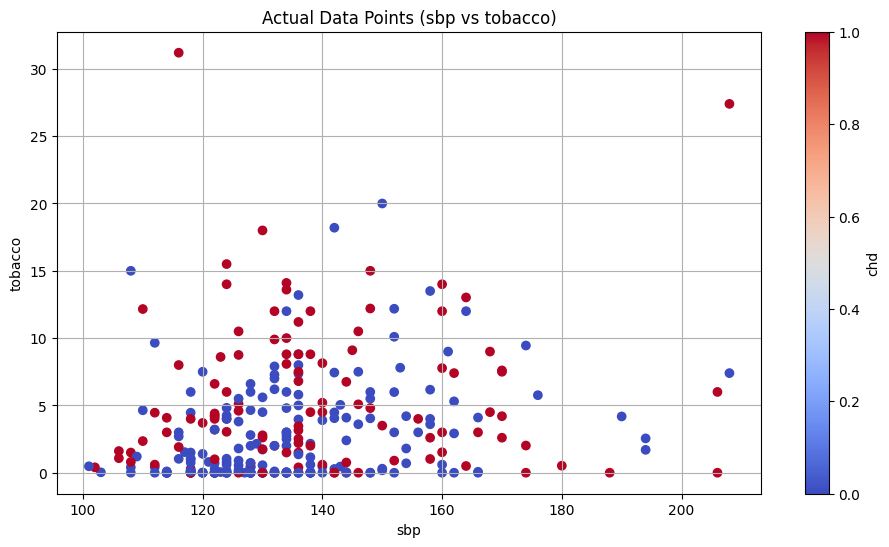

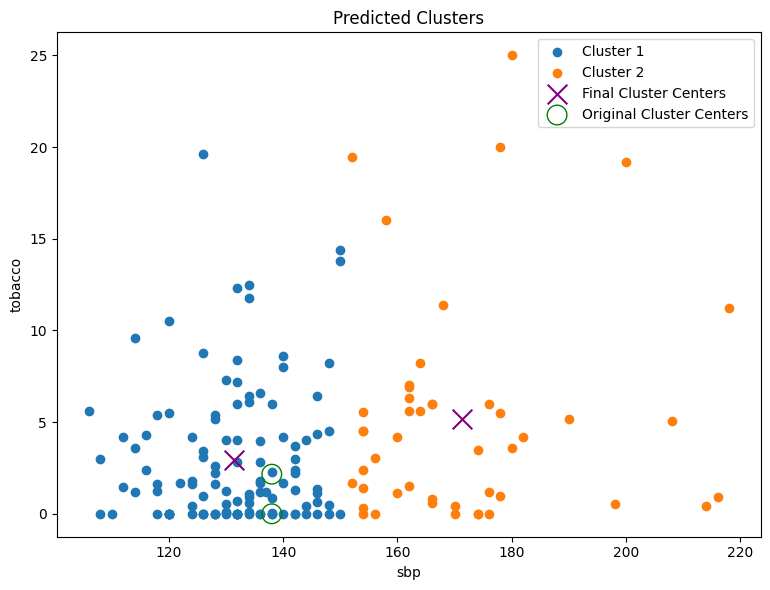

In [10]:
# Extract features for K-Means clustering
data2Fixed = data2[['sbp', 'tobacco']].values

# Split the data into training and testing sets
data2Fixed_train = data2Fixed[:300]
data2Fixed_test = data2Fixed[300:]

# Define indices for initial cluster centers
n_samples = data2Fixed_train.shape[0]
initial_centers_indices = np.random.choice(n_samples, size=2, replace=False)
centress = data2Fixed_train[initial_centers_indices]

# Run K-Means for 100 epochs max
convergedAt = 0
centers, clusters, convergedAt = kmeans(data2Fixed_test, 2, centress, max_iterations=100)
centers = np.array(centers)

# Plotting actual and predicted clusters
plt.figure(figsize=(25, 6))


# Plot actual clusters for training data
plt.subplot(1, 2, 1)
plt.scatter(data2Fixed_train[:, 0], data2Fixed_train[:, 1], c=data2.iloc[:300, 9], cmap='coolwarm')
plt.title('Actual Data Points (sbp vs tobacco)')
plt.xlabel('sbp')
plt.ylabel('tobacco')
plt.colorbar(label='chd')
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 6))

# Plot predicted clusters for training data
plt.subplot(1, 2, 2)
for i, cluster in enumerate(clusters):
    if cluster:
        cluster_points = np.array(cluster)
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')
plt.scatter(centers[:, 0], centers[:, 1], marker='x', c='purple', s=200, label='Final Cluster Centers')
plt.scatter(centress[:, 0], centress[:, 1], marker='o', c='none', edgecolors='green', s=200, label='Original Cluster Centers')
plt.title('Predicted Clusters')
plt.xlabel('sbp')
plt.ylabel('tobacco')
plt.legend()

plt.tight_layout()
plt.show()

## Accuracy for Dataset 2

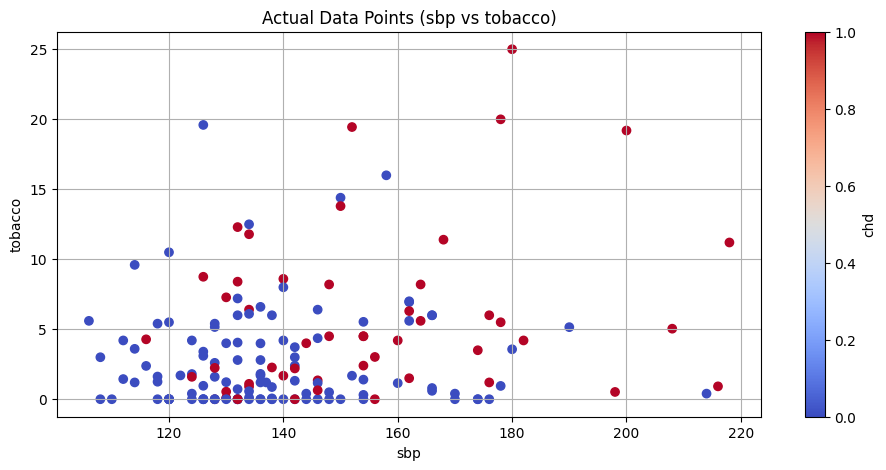

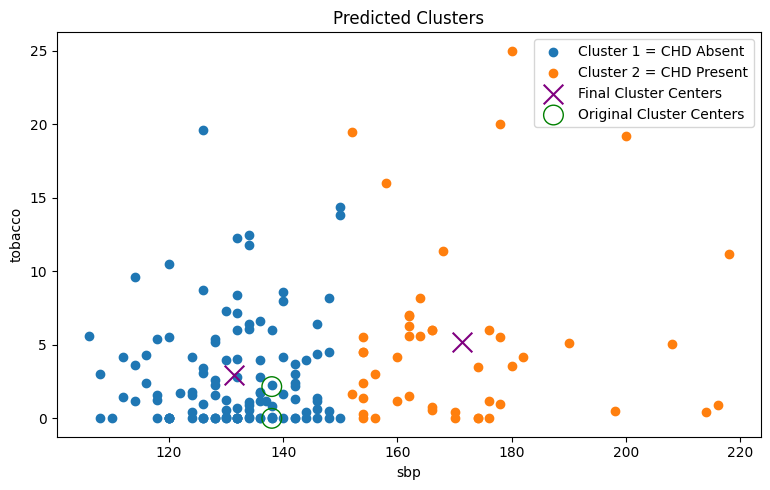

Total Sample Size:  162
actualZeroes:  112
actualOnes:  50
predictedZeroes:  115
correctPredictedZeroes:  89
predictedOnes:  47
correctPredictedOnes:  24
correct_predictions: 113
len(clusters): 2
Accuracy: 0.6975308641975309
Q6: Accuracy (%): 69.75%
Using Accuracy Formula: 69.75%


In [11]:
# Compare Actual Values With Predicted Values

# Plot actual clusters for training data
plt.figure(figsize=(25, 5))
plt.subplot(1, 2, 1)
plt.scatter(data2Fixed_test[:, 0], data2Fixed_test[:, 1], c=data2.iloc[300:, 9], cmap='coolwarm')
plt.title('Actual Data Points (sbp vs tobacco)')
plt.xlabel('sbp')
plt.ylabel('tobacco')
plt.colorbar(label='chd')
plt.grid(True)
plt.show()

# Plot predicted clusters for training data
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 2)
for i, cluster in enumerate(clusters):
    if cluster:
        cluster_points = np.array(cluster)
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {(i+1)}{" = CHD Absent" if ((i+1) == 1) else " = CHD Present"}')
plt.scatter(centers[:, 0], centers[:, 1], marker='x', c='purple', s=200, label='Final Cluster Centers')
plt.scatter(centress[:, 0], centress[:, 1], marker='o', c='none', edgecolors='green', s=200, label='Original Cluster Centers')
plt.title('Predicted Clusters')
plt.xlabel('sbp')
plt.ylabel('tobacco')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate accuracy
def find_cluster_number(point, centers):
    distances = [euclidean_distance(point, center) for center in centers]
    nearest_cluster_index = np.argmin(distances)
    return (nearest_cluster_index + 1)

# Example point
point_to_check = [103, 0.03]

# Find the cluster number for the point
cluster_number = find_cluster_number(point_to_check, centers)

chd_values_test = data2.iloc[300:, 9]
correct_predictions = 0
actualZeroes = 0
actualOnes = 0
predictedZeroes = 0
predictedOnes = 0
correctPredictedZeroes = 0
correctPredictedOnes = 0
totalValues = 0

total_samples = len(chd_values_test)

predicted_labelsInit = []

for point in data2Fixed_test:
    distances = [euclidean_distance(point, center) for center in centers]
    nearest_cluster_index = np.argmin(distances)
    predicted_labelsInit.append(nearest_cluster_index)

predicted_labelsInit = np.array(predicted_labelsInit)

predicted_labels = []

if (cluster_number == 2):
  predicted_labels = np.where(predicted_labelsInit == 0, 1, np.where(predicted_labelsInit == 1, 0, predicted_labelsInit))
else:
  predicted_labels = predicted_labelsInit

for true_label, predicted_label in zip(chd_values_test, predicted_labels):
    if true_label == predicted_label:
        correct_predictions += 1
        if predicted_label == 1:
          correctPredictedOnes += 1
        else:
          correctPredictedZeroes += 1
    if true_label == 1:
      actualOnes += 1
    else:
      actualZeroes += 1
    if predicted_label == 1:
      predictedOnes += 1
    else:
      predictedZeroes += 1
    totalValues += 1

accuracy = correct_predictions / total_samples

print("Total Sample Size: ", totalValues)
print("actualZeroes: ", actualZeroes)
print("actualOnes: ", actualOnes)
print("predictedZeroes: ", predictedZeroes)
print("correctPredictedZeroes: ", correctPredictedZeroes)
print("predictedOnes: ", predictedOnes)
print("correctPredictedOnes: ", correctPredictedOnes)

print("correct_predictions:", correct_predictions)
print("len(clusters):", len(clusters))
print("Accuracy:", accuracy)
print("Q6: Accuracy (%): " + str(round((accuracy * 100), 2)) + "%")

truePositives = correctPredictedOnes
trueNegatives = correctPredictedZeroes
falsePositives = predictedOnes - correctPredictedOnes
falseNegatives = predictedZeroes - correctPredictedZeroes

print("Using Accuracy Formula: " + str(round(((truePositives + trueNegatives) / (truePositives + trueNegatives + falsePositives + falseNegatives)) * 100, 2)) + "%")

# Part B

## NN Clustering for Dataset 1

Starting with inital cluster -> [ 2 10]
[0, 1, 2, 0, 2, 2, 1, 0]


Final clusters: [[array([ 2, 10]), array([5, 8]), array([4, 9])], [array([2, 5]), array([1, 2])], [array([8, 4]), array([7, 5]), array([6, 4])]]




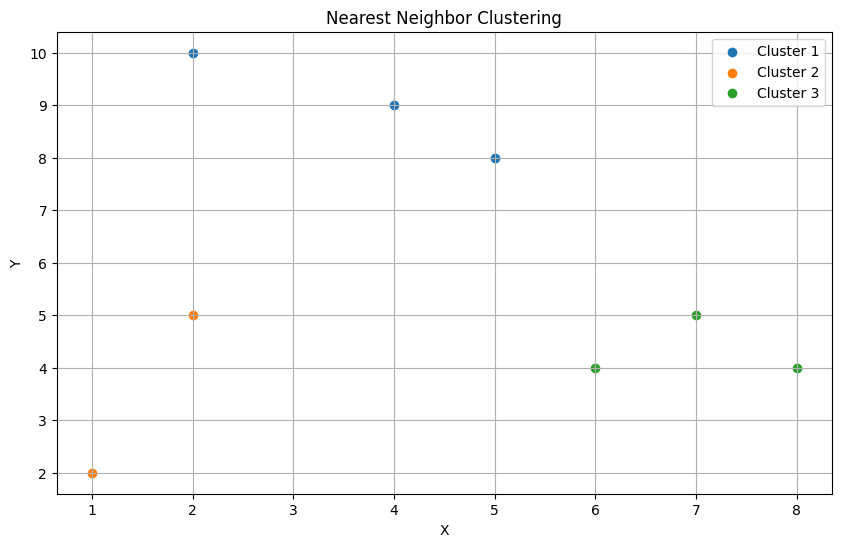

In [12]:
import numpy as np
import matplotlib.pyplot as plt


def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def nearest_neighbor_clustering(data, threshold):
    # Initialize clusters with the first data point
    predictedCHD = []
    predictedCHD.append(0)
    clusters = [[data[0]]]
    print("Starting with inital cluster -> " + str(data[0]))

    # Iterate over each data point
    for point in data[1:]:
        # Flag to check if the point is assigned to any existing cluster
        assigned = False
        # Iterate over each cluster
        for i, cluster in enumerate(clusters):
            # Calculate distance from the current point to the cluster center (first point)
            distance = euclidean_distance(point, cluster[0])
            # If distance is less than the threshold, add the point to the cluster
            if distance <= threshold:
                cluster.append(point)
                predictedCHD.append(i)
                assigned = True
                break
        # If the point is not assigned to any existing cluster, create a new cluster
        if not assigned:
            clusters.append([point])
            predictedCHD.append(len(clusters) - 1)

    return clusters, predictedCHD

# Perform Nearest Neighbor clustering with a threshold of 4
clusters_nn, predictedCHD = nearest_neighbor_clustering(data1, threshold=4)

print(predictedCHD)
print("\n\nFinal clusters: " + str(clusters_nn) + "\n\n")

# Plot the final clusters
plt.figure(figsize=(10, 6))
for i, cluster in enumerate(clusters_nn):
    cluster_points = np.array(cluster)
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')
plt.title('Nearest Neighbor Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()
plt.show()

## Q9. Have you get the same results are you got using K-Means ?

Q9: Both algorithms have resulted in creating the same clusters which contain the same points.

## Q11 Compare the performance of K-means and nearest neighbour clustering algorithms. Provide disadvantages of the algorithms on bigger datasets.

Q11: Smaller datasets yields similiar performance results, however the performance can have an impact for larger datasets.

K-means tend to be faster/more efficient for larger datasets because the cluster size doesnt change. The main disadvantage is that K-means require well defined cluster centres and it becomes increasingly more difficult to find cluster centres for increasingly larger datasets.

NN-clustering tends to slower. It will create more clusters if needs be which is computationally expensive although leading to a well balanced cluster set compared to K-means. NN-clustering still however requires good threshold values which can have an effect on the cluster set.

# Dataset 2 and Accuracy comparison

Starting with inital cluster -> [138.   0.]


Final clusters: [[array([138.,   0.]), array([138.  ,   2.27]), array([170.,   0.]), array([128.,   0.]), array([136. ,   1.2]), array([128.,   0.]), array([150. ,  14.4]), array([132. ,   8.4]), array([142. ,   2.4]), array([1.3e+02, 5.0e-02]), array([174. ,   3.5]), array([114. ,   9.6]), array([162. ,   1.5]), array([174.,   0.]), array([154. ,   1.4]), array([124.,   0.]), array([114. ,   1.2]), array([168. ,  11.4]), array([142.  ,   3.72]), array([154.,   0.]), array([146.  ,   4.36]), array([166.,   6.]), array([140. ,   8.6]), array([136. ,   1.7]), array([156.,   0.]), array([132.,   0.]), array([128.,   0.]), array([106. ,   5.6]), array([144. ,   0.4]), array([154.  ,   0.31]), array([126. ,   3.1]), array([134. ,   6.4]), array([152.  ,  19.45]), array([146.  ,   1.35]), array([162.  ,   6.94]), array([130.  ,   7.28]), array([138.,   6.]), array([148.,   0.]), array([124. ,   4.2]), array([118.  ,   1.62]), array([116.  ,   4.2

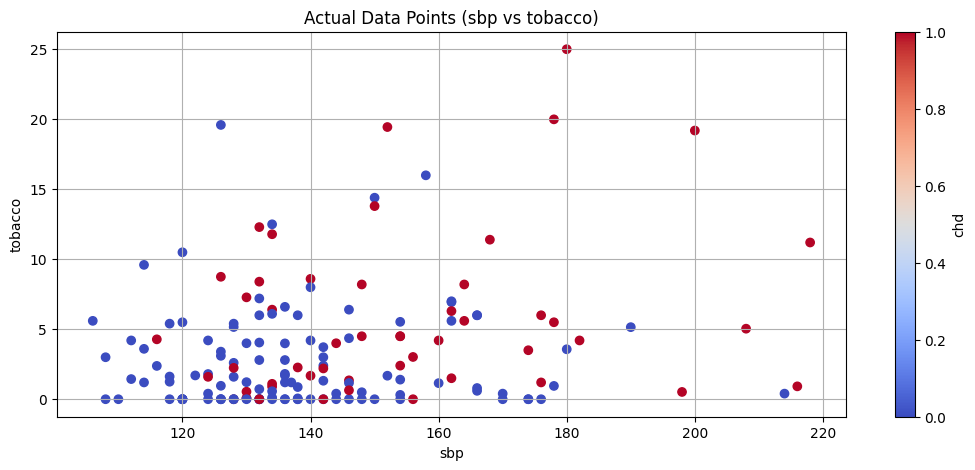

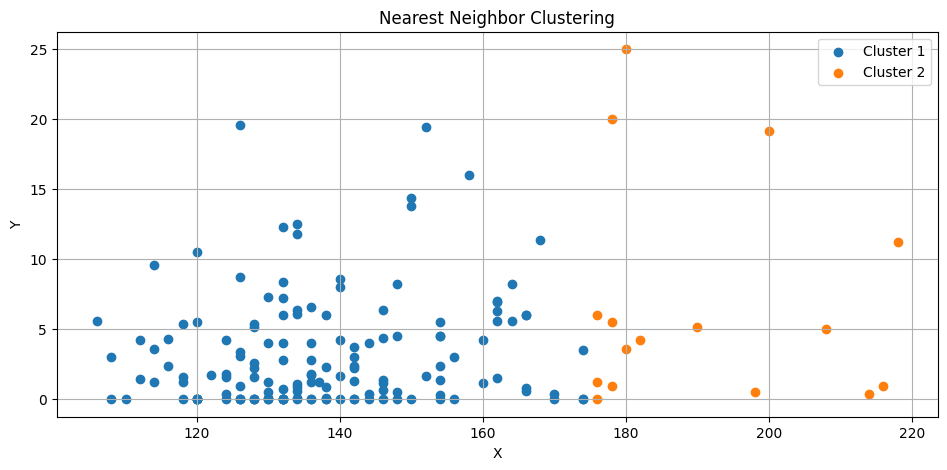

Total Sample Size:  162
actualZeroes:  112
actualOnes:  50
predictedZeroes:  146
correctPredictedZeroes:  107
predictedOnes:  16
correctPredictedOnes:  11
correct_predictions: 118
len(clusters): 2
Accuracy: 0.7283950617283951
Q12: Accuracy (%): 72.84%
Using Accuracy Formula: 72.84%


In [13]:
# Perform Nearest Neighbor clustering with a threshold of 37, which is the minimum value needed for two clusters
data2Fixed_test = data2Fixed[300:]
clusters_nn, predictedCHD = nearest_neighbor_clustering(data2Fixed_test, threshold=37)

print("\n\nFinal clusters: " + str(clusters_nn) + "\n\n")
print(predictedCHD)

pCHD = np.array(predictedCHD)
print(pCHD)

# Plot actual clusters for training data
plt.figure(figsize=(28, 5))
plt.subplot(1, 2, 1)
plt.scatter(data2Fixed_test[:, 0], data2Fixed_test[:, 1], c=data2.iloc[300:, 9], cmap='coolwarm')
plt.title('Actual Data Points (sbp vs tobacco)')
plt.xlabel('sbp')
plt.ylabel('tobacco')
plt.colorbar(label='chd')
plt.grid(True)
plt.show()

# Plot predicted clusters for training data
plt.figure(figsize=(25, 5))
plt.subplot(1, 2, 2)
for i, cluster in enumerate(clusters_nn):
    cluster_points = np.array(cluster)
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')
plt.title('Nearest Neighbor Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()
plt.show()

# Calculate accuracy
chd_values_test = data2.iloc[300:, 9]
correct_predictions = 0
actualZeroes = 0
actualOnes = 0
predictedZeroes = 0
predictedOnes = 0
correctPredictedZeroes = 0
correctPredictedOnes = 0
totalValues = 0

total_samples = len(chd_values_test)
predicted_labels = []

for true_label, predicted_label in zip(chd_values_test, pCHD):
    if true_label == predicted_label:
        correct_predictions += 1
        if predicted_label == 1:
          correctPredictedOnes += 1
        else:
          correctPredictedZeroes += 1
    if true_label == 1:
      actualOnes += 1
    else:
      actualZeroes += 1
    if predicted_label == 1:
      predictedOnes += 1
    else:
      predictedZeroes += 1
    totalValues += 1

accuracy = correct_predictions / total_samples

print("Total Sample Size: ", totalValues)
print("actualZeroes: ", actualZeroes)
print("actualOnes: ", actualOnes)
print("predictedZeroes: ", predictedZeroes)
print("correctPredictedZeroes: ", correctPredictedZeroes)
print("predictedOnes: ", predictedOnes)
print("correctPredictedOnes: ", correctPredictedOnes)

print("correct_predictions:", correct_predictions)
print("len(clusters):", len(clusters))
print("Accuracy:", accuracy)
print("Q12: Accuracy (%): " + str(round((accuracy * 100), 2)) + "%")

truePositives = correctPredictedOnes
trueNegatives = correctPredictedZeroes
falsePositives = predictedOnes - correctPredictedOnes
falseNegatives = predictedZeroes - correctPredictedZeroes

print("Using Accuracy Formula: " + str(round(((truePositives + trueNegatives) / (truePositives + trueNegatives + falsePositives + falseNegatives)) * 100, 2)) + "%")

# Part C

## DBScan

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def dbscan(data, epsilon, min_points):
    # Initialize labels array, 0 means unvisited, -1 means noise, and positive integers represent clusters
    labels = np.zeros(len(data))
    cluster_id = 0

    # Iterate over each point
    for i, point in enumerate(data):
        # If the point has already been visited, continue
        if labels[i] != 0:
            continue

        # Find the neighboring points
        neighbors = []
        for j, neighbor in enumerate(data):
            if euclidean_distance(point, neighbor) <= epsilon:
                neighbors.append(j)

        # If the number of neighbors is less than min_points, mark as noise
        if len(neighbors) < min_points:
            labels[i] = -1
            continue

        # Expand the cluster
        cluster_id += 1
        labels[i] = cluster_id
        for neighbor_index in neighbors:
            # If point is noise point, since it connects to core point directly, add it to cluster
            if labels[neighbor_index] == -1:
                labels[neighbor_index] = cluster_id
            # If point is visited point, skip
            if labels[neighbor_index] != 0:
                continue
            #Add point to current cluster
            labels[neighbor_index] = cluster_id

            neighbor_neighbors = []
            for j, neighbor_of_neighbor in enumerate(data):
                if euclidean_distance(data[neighbor_index], neighbor_of_neighbor) <= epsilon:
                    neighbor_neighbors.append(j)
            if len(neighbor_neighbors) >= min_points:
                neighbors.extend(neighbor_neighbors)

    return labels

### Dataset 1 with Epsilon = 2

[-1. -1.  1.  2.  1.  1. -1.  2.]
-1.0
1.0
2.0


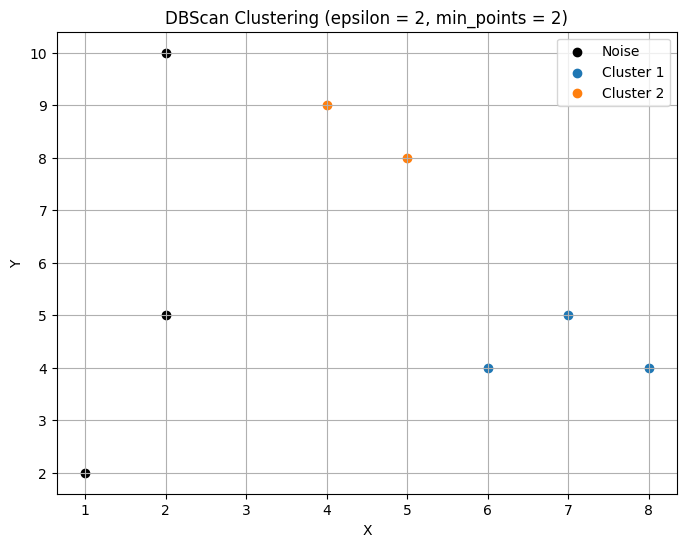

In [15]:
#  Dataset 1
# data1 = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])

# Perform DBScan for epsilon = 2 and min_points = 2
epsilon1 = 2
min_points1 = 2
label1 = dbscan(data1, epsilon1, min_points1)
labels1 = np.array(label1)
print(labels1)

# Plot the clusters
plt.figure(figsize=(8, 6))
for label in np.unique(labels1):
    print(label)
    if label == -1:
        plt.scatter(data1[labels1 == label][:, 0], data1[labels1 == label][:, 1], color='black', label='Noise')
    else:
        plt.scatter(data1[labels1 == label][:, 0], data1[labels1 == label][:, 1], label=f'Cluster {int(label)}')
plt.title(f'DBScan Clustering (epsilon = {epsilon1}, min_points = {min_points1})')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

### Data set 1 with Epsilon = sqrt(10)

[-1. -1.  1.  2.  1.  1. -1.  2.]


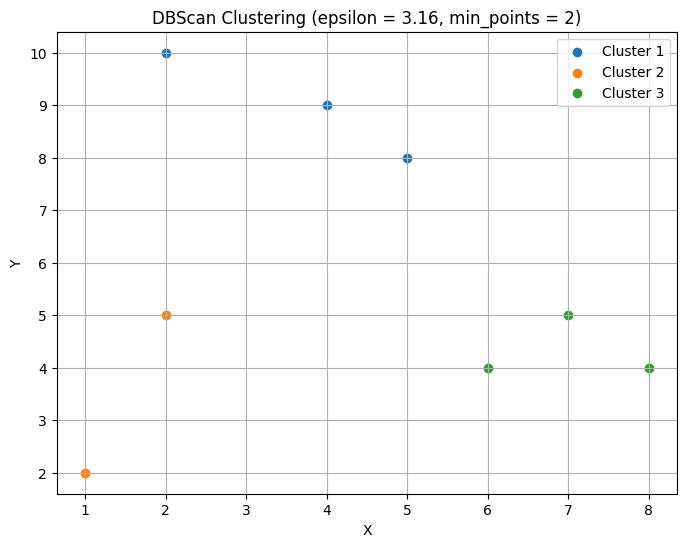

In [16]:
# Perform DBScan for epsilon = sqrt(10) and min_points = 2
epsilon2 = np.sqrt(10)
min_points2 = 2
label2 = dbscan(data1, epsilon2, min_points2)
labels2 = np.array(label2)
print(labels1)

# Plot the clusters
plt.figure(figsize=(8, 6))
for label in np.unique(labels2):
    if label == -1:
        plt.scatter(data1[labels2 == label][:, 0], data1[labels2 == label][:, 1], color='black', label='Noise')
    else:
        plt.scatter(data1[labels2 == label][:, 0], data1[labels2 == label][:, 1], label=f'Cluster {int(label)}')
plt.title(f'DBScan Clustering (epsilon = {epsilon2:.2f}, min_points = {min_points2})')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

## Dataset 2 and Accuracy Comparison

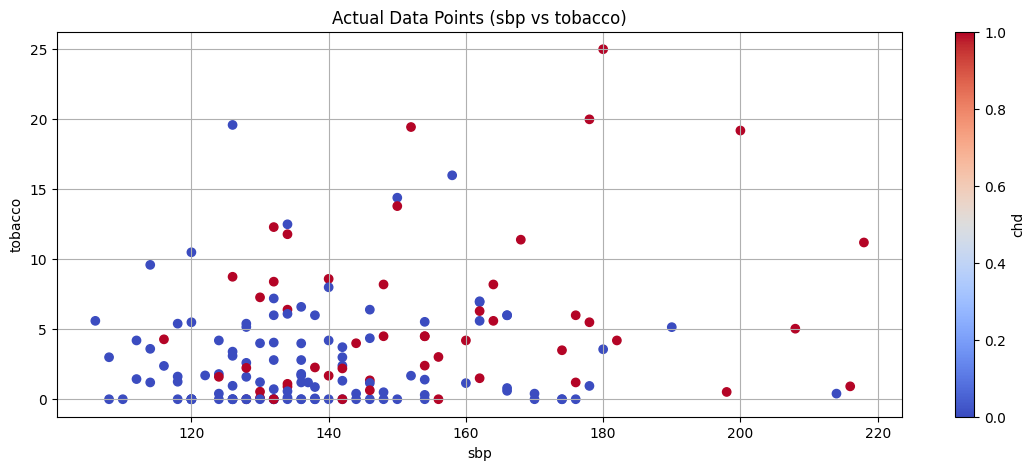

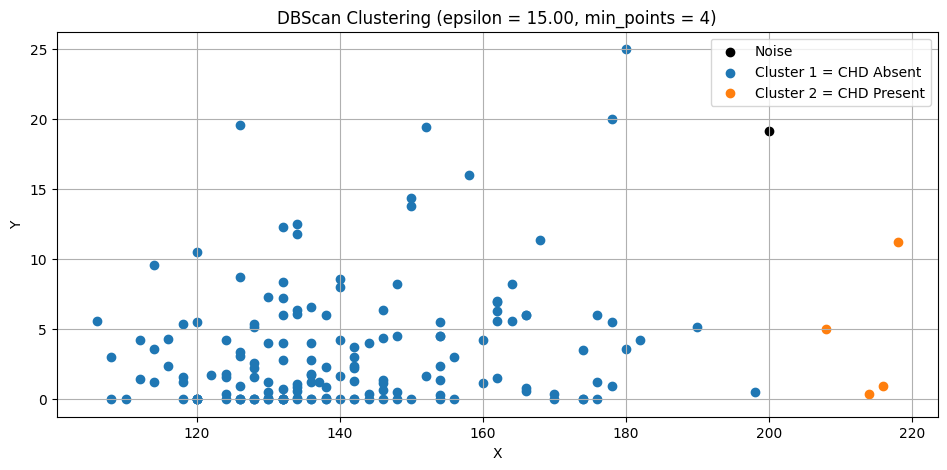

Total Sample Size:  162
actualZeroes:  112
actualOnes:  50
predictedZeroes:  158
correctPredictedZeroes:  111
predictedOnes:  4
correctPredictedOnes:  3
noiseForOne:  1
noiseForZero:  0
totalNoisePoints:  1
correct_predictions: 114
len(clusters): 2
Accuracy: 0.7037037037037037
Q15: Accuracy (%): 70.37%
Using Accuracy Formula: 70.37%


In [17]:
data2Fixed_test = data2Fixed[300:]
# print(data2Fixed_test)

# Perform DBScan for epsilon = sqrt(10) and min_points = 2
epsilon3 = 15
min_points3 = 4
label3 = dbscan(data2Fixed_test, epsilon3, min_points3)
labels3 = np.array(label3)

# Plot actual clusters for training data
plt.figure(figsize=(30, 5))
plt.subplot(1, 2, 1)
plt.scatter(data2Fixed_test[:, 0], data2Fixed_test[:, 1], c=data2.iloc[300:, 9], cmap='coolwarm')
plt.title('Actual Data Points (sbp vs tobacco)')
plt.xlabel('sbp')
plt.ylabel('tobacco')
plt.colorbar(label='chd')
plt.grid(True)
plt.show()

# Plot predicted clusters for training data
plt.figure(figsize=(25, 5))
plt.subplot(1, 2, 2)
for label in np.unique(labels3):
    if label == -1:
        plt.scatter(data2Fixed_test[labels3 == label][:, 0], data2Fixed_test[labels3 == label][:, 1], color='black', label='Noise')
    else:
        plt.scatter(data2Fixed_test[labels3 == label][:, 0], data2Fixed_test[labels3 == label][:, 1], label=f'Cluster {int(label)}{" = CHD Absent" if (int(label) == 1) else " = CHD Present"}')

plt.title(f'DBScan Clustering (epsilon = {epsilon3:.2f}, min_points = {min_points3})')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

# Calculate accuracy
chd_values_test = data2.iloc[300:, 9]
correct_predictions = 0

actualZeroes = 0
predictedZeroes = 0
correctPredictedZeroes = 0
noiseForZero = 0

actualOnes = 0
predictedOnes = 0
correctPredictedOnes = 0
noiseForOne = 0


totalNoisePoints = 0
totalValues = 0

total_samples = len(chd_values_test)

predicted_labels = []
labels3 = labels3.astype('int32')

for true_label, predicted_label in zip(chd_values_test, labels3):
    predicted_label -= 1
    if true_label == predicted_label:
        correct_predictions += 1
        if predicted_label == 1:
          correctPredictedOnes += 1
        else:
          correctPredictedZeroes += 1
    if true_label == 1:
      actualOnes += 1
    else:
      actualZeroes += 1
    if predicted_label == 1:
      predictedOnes += 1
    else:
      predictedZeroes += 1
    if ((predicted_label < 0) and (true_label == 1)):
      noiseForOne += 1
      totalNoisePoints += 1

    if ((predicted_label < 0) and (true_label == 0)):
      noiseForZero += 1
      totalNoisePoints += 1

    totalValues += 1

accuracy = correct_predictions / total_samples

print("Total Sample Size: ", totalValues)
print("actualZeroes: ", actualZeroes)
print("actualOnes: ", actualOnes)
print("predictedZeroes: ", predictedZeroes)
print("correctPredictedZeroes: ", correctPredictedZeroes)
print("predictedOnes: ", predictedOnes)
print("correctPredictedOnes: ", correctPredictedOnes)
print("noiseForOne: ", noiseForOne)
print("noiseForZero: ", noiseForZero)
print("totalNoisePoints: ", totalNoisePoints)

print("correct_predictions:", correct_predictions)
print("len(clusters):", len(clusters))
print("Accuracy:", accuracy)
print("Q15: Accuracy (%): " + str(round((accuracy * 100), 2)) + "%")

truePositives = correctPredictedOnes
trueNegatives = correctPredictedZeroes
falsePositives = predictedOnes - correctPredictedOnes
falseNegatives = predictedZeroes - correctPredictedZeroes

print("Using Accuracy Formula: " + str(round(((truePositives + trueNegatives) / (truePositives + trueNegatives + falsePositives + falseNegatives)) * 100, 2)) + "%")

## Q16. Provide your observations with comparisons

Overall  accuracy results:

- K-means: 69.75 %
- NN-clustering: 72.8 %
- DBScan: 70.4 %

From analysing the accuracy, they all cluster similiarily, however, NN-clustering seems to have performed the most accurate out of all algorithms.

## Dataset 1 - K_means

The Original centroids are: [[2 5]
 [8 4]
 [4 9]]
The new centroids are: [[1.5        3.5       ]
 [7.         4.33333333]
 [3.66666667 9.        ]]


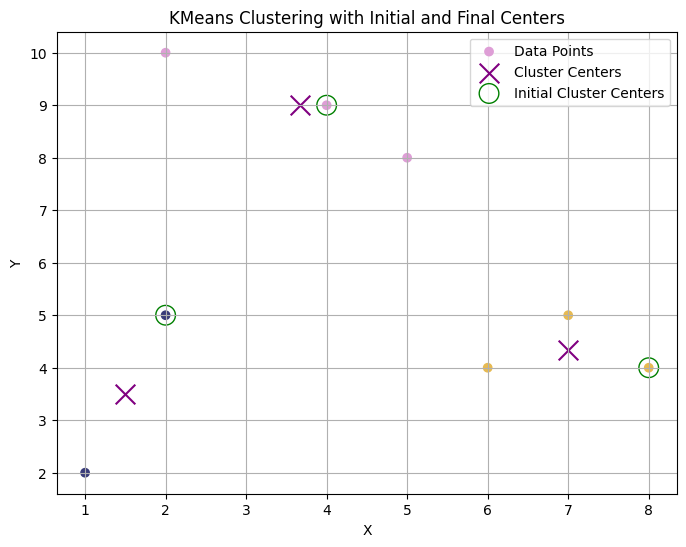

In [18]:
# Define the number of clusters
k = 3

# Define the initial cluster centers
ogCenters = np.array([data1[1], data1[2], data1[7]])

# Initialize KMeans object
kmeans = KMeans(n_clusters=k, init=ogCenters, n_init=1)  # Set initial centers

# Fit KMeans to the data
kmeans.fit(data1)

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Get the cluster labels for each data point
labels = kmeans.labels_


print(f"The Original centroids are: {ogCenters}")
print(f"The new centroids are: {centroids}")


# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(data1[:, 0], data1[:, 1], c=labels, cmap='tab20b', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='purple', s=200, label='Cluster Centers')
plt.scatter(ogCenters[:, 0], ogCenters[:, 1], marker='o', c='none', edgecolors='green', s=200, label='Initial Cluster Centers')
plt.title('KMeans Clustering with Initial and Final Centers')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

## Dataset 2 - K_means

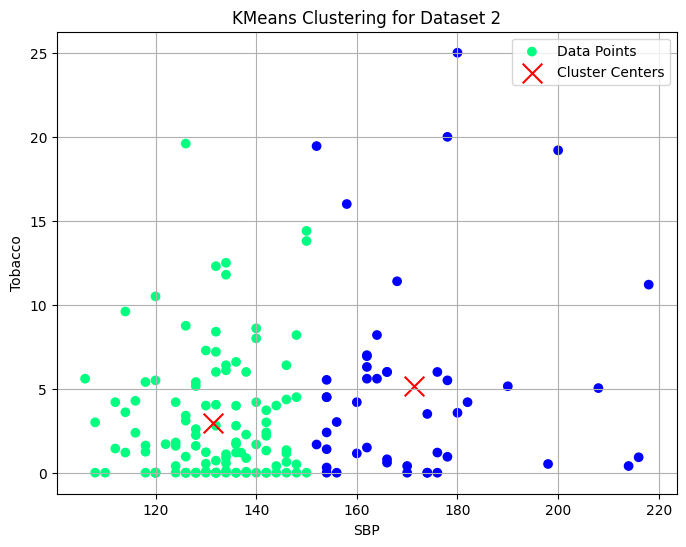

Accuracy: 0.30246913580246915
Accuracy (%): 30.25%


In [19]:
# Define the number of clusters
k = 2

# Initialize KMeans object
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

# Fit KMeans to the data
kmeans.fit(data2Fixed_test)

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Get the cluster labels for each data point
labels = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(data2Fixed_test[:, 0], data2Fixed_test[:, 1], c=labels, cmap='winter', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=200, label='Cluster Centers')
plt.title('KMeans Clustering for Dataset 2')
plt.xlabel('SBP')
plt.ylabel('Tobacco')
plt.legend()
plt.grid(True)
plt.show()

# Accuracy
target_values = chd_values_test = data2.iloc[300:, 9]

score = metrics.accuracy_score(target_values, labels)
print("Accuracy:", score)
print("Accuracy (%): " + str(round((score * 100), 2)) + "%")

## Conclusions

Results are the same

## Dataset 1 - KNN

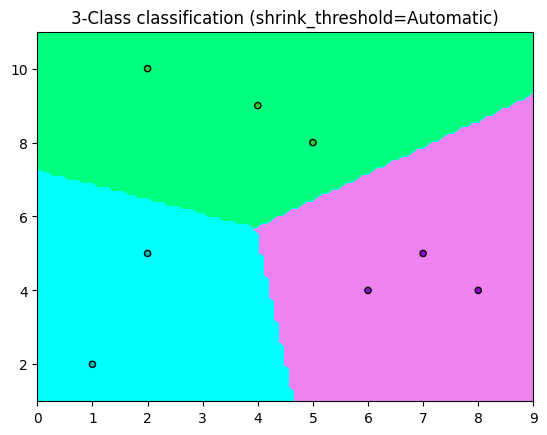

Accuracy: 1.0
Accuracy (%): 100.0%


In [20]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import NearestCentroid

# Import some data to play with. We only take the first two features. We could avoid this ugly slicing by using a two-dim dataset
X = data1
y = [0, 1, 2, 0, 2, 2, 1, 0]

# Create color maps
cmap_light = ListedColormap(["springgreen", "cyan", "violet"])
cmap_bold = ListedColormap(["limegreen", "c", "darkviolet"])

for shrinkage in [None]:
    # we create an instance of Nearest Centroid Classifier and fit the data.
    clf = NearestCentroid(shrink_threshold=shrinkage)
    clf.fit(X, y)
    y_pred = clf.predict(X)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf, X, cmap=cmap_light, ax=ax, response_method="predict"
    )

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor="k", s=20)
    plt.title("3-Class classification (shrink_threshold=Automatic)")
    plt.axis("tight")

plt.show()

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)

print("Accuracy:", accuracy)
print("Accuracy (%): " + str(round((accuracy * 100), 2)) + "%")

Datset 2 - KMeans

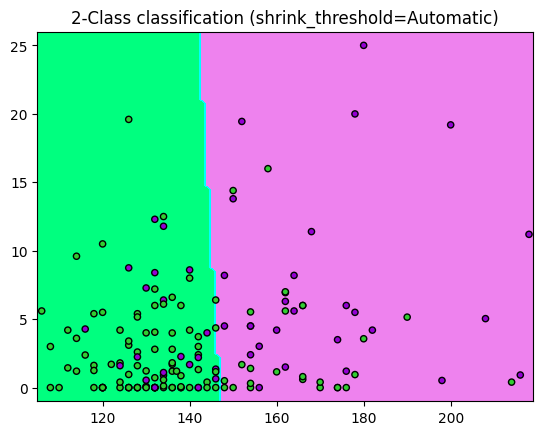

Accuracy: 0.6851851851851852
Accuracy (%): 68.52%


In [21]:
chd_values_test = data2.iloc[300:, 9]

X = data2Fixed_test
y = chd_values_test

# Create color maps
cmap_light = ListedColormap(["springgreen", "cyan", "violet"])
cmap_bold = ListedColormap(["limegreen", "c", "darkviolet"])

for shrinkage in [None]:
    # we create an instance of Nearest Centroid Classifier and fit the data.
    clf = NearestCentroid(shrink_threshold=shrinkage)
    clf.fit(X, y)
    y_pred = clf.predict(X)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf, X, cmap=cmap_light, ax=ax, response_method="predict"
    )

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor="k", s=20)
    plt.title("2-Class classification (shrink_threshold=Automatic)")
    plt.axis("tight")

plt.show()

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)

print("Accuracy:", accuracy)
print("Accuracy (%): " + str(round((accuracy * 100), 2)) + "%")

## Conslusion:

Results are the same

## Dataset 1 - DBScan - Epsilon(2)




Estimated number of clusters: 2
Estimated number of noise points: 3


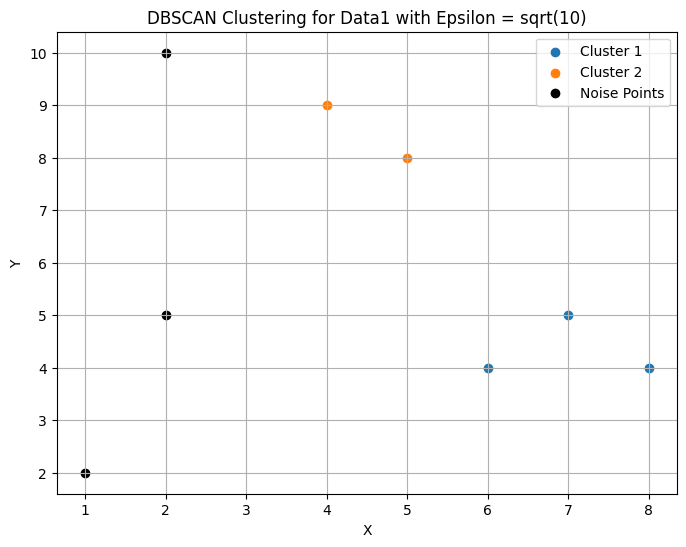

In [22]:
# Define the parameters for DBSCAN
epsilon = 2
min_samples = 2

# Initialize DBSCAN object
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)

# Fit DBSCAN to the data
dbscan.fit(data1)

# Get the cluster labels
labels = dbscan.labels_

# Number of clusters in labels, including noise points.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot the clusters
plt.figure(figsize=(8, 6))

# Plot data points with cluster labels
unique_labels = set(labels)
for label in unique_labels:
    if label == -1:
        plt.scatter(data1[labels == label, 0], data1[labels == label, 1], color='black', label='Noise Points')
    else:
        plt.scatter(data1[labels == label, 0], data1[labels == label, 1], label=f'Cluster {label + 1}')

plt.title('DBSCAN Clustering for Data1 with Epsilon = sqrt(10)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

## Dataset 1 - DBScan - Epsilon(sqrt(10))

Estimated number of clusters: 3
Estimated number of noise points: 0


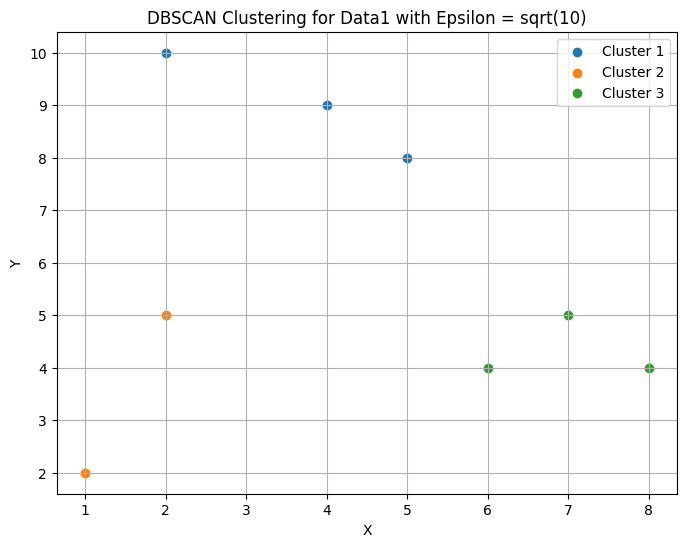

In [23]:
# Define the parameters for DBSCAN
epsilon = np.sqrt(10)
min_samples = 2

# Initialize DBSCAN object
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)

# Fit DBSCAN to the data
dbscan.fit(data1)

# Get the cluster labels
labels = dbscan.labels_

# Number of clusters in labels, including noise points.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot the clusters
plt.figure(figsize=(8, 6))

# Plot data points with cluster labels
unique_labels = set(labels)
for label in unique_labels:
    if label == -1:
        plt.scatter(data1[labels == label, 0], data1[labels == label, 1], color='black', label='Noise Points')
    else:
        plt.scatter(data1[labels == label, 0], data1[labels == label, 1], label=f'Cluster {label + 1}')

plt.title('DBSCAN Clustering for Data1 with Epsilon = sqrt(10)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

## Dataset 2

Estimated number of clusters: 2


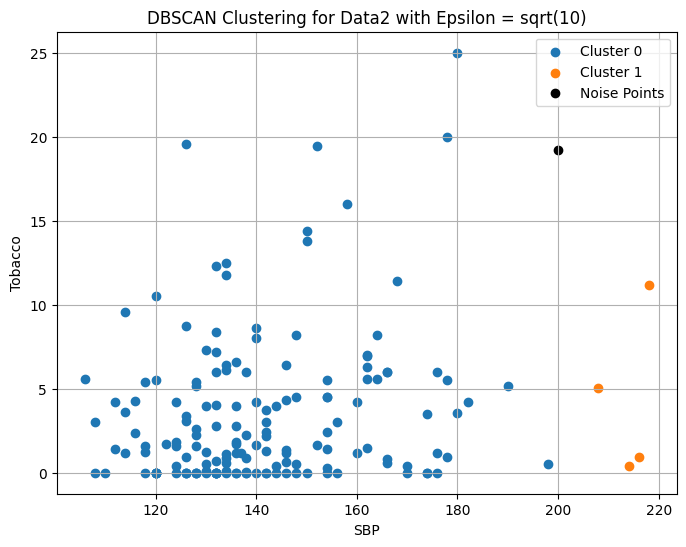

Accuracy: 0.7037037037037037
Accuracy (%): 70.37%


In [24]:
# Define the parameters for DBSCAN
epsilon = 15
min_samples = 4
# 15 and 4

# Initialize DBSCAN object
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)

# Fit DBSCAN to the data
dbscan.fit(data2Fixed_test)

# Get the cluster labels
labels = dbscan.labels_

# Number of clusters in labels, including noise points.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)  # Subtract 1 for noise points

print('Estimated number of clusters: %d' % n_clusters_)

# Plot the clusters
plt.figure(figsize=(8, 6))

# Map each unique label to a color from the colormap
unique_labels = set(labels)
for label in unique_labels:
    if label == -1:
        plt.scatter(data2Fixed_test[labels == label, 0], data2Fixed_test[labels == label, 1], color='black', label='Noise Points')
    else:
        plt.scatter(data2Fixed_test[labels == label, 0], data2Fixed_test[labels == label, 1], label=f'Cluster {label}')

plt.title('DBSCAN Clustering for Data2 with Epsilon = sqrt(10)')
plt.xlabel('SBP')
plt.ylabel('Tobacco')
plt.legend()
plt.grid(True)
plt.show()


# Calculate Accuracy
target_values = chd_values_test
accuracy = accuracy_score(target_values, labels)

print("Accuracy:", accuracy)
print("Accuracy (%): " + str(round((accuracy * 100), 2)) + "%")

## Q16. Provide your observations with comparisons

Comparing each algorithm with own implementations, the accuracy seems to match overall. NN-clustering however was different in that the SKlearn implementation had an accuracy of 68.52% accuracy while own implementation had an accuracy of 72.8%.

# Lab Questions

## 1. What are the different metrics used to evaluate the performance of different clustering algorithms?

The different metrics vary depending on the clustering algorithm used. For K-means, the Davies-Bouldin Index, Calinski-Harabasz Index, and Silhouette Score are different metrics used to check for cluster-point fit, cluster seperation quality and the ratio and the quality of cluster seperation.

For NN clustering, we can use accuracy, precision, recall and F1-score.



## 2. Instead of accuracy, what other ways can we evaluate the performance of three algorithms in lab 3?

Instead of accuracy, we can use the aforementioned metrics including Arjuster Rand Index (ARI), Solhouetter Score and Davies-Bouldin Index. ARI measures the similarity between the clustering generated by the algorithms and the true label. This determines how well the algorithm captures the structure of the data. The silhouette score determines how well the algorithms seperate the clusters. THe Davies-Bouldin index evaluates the clustering quality by considering the differences between intra and inter clusters.